## Testando com mais tempo e mais dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, accuracy_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

import extractor as ext

Em ordem a seguir temos um exemplo dos sensores

rest  
extension  
flexion  
ulnar_deviation  
radial_deviation  
grip  
finger_abduction  
finger_adduction  
supination  
pronation  

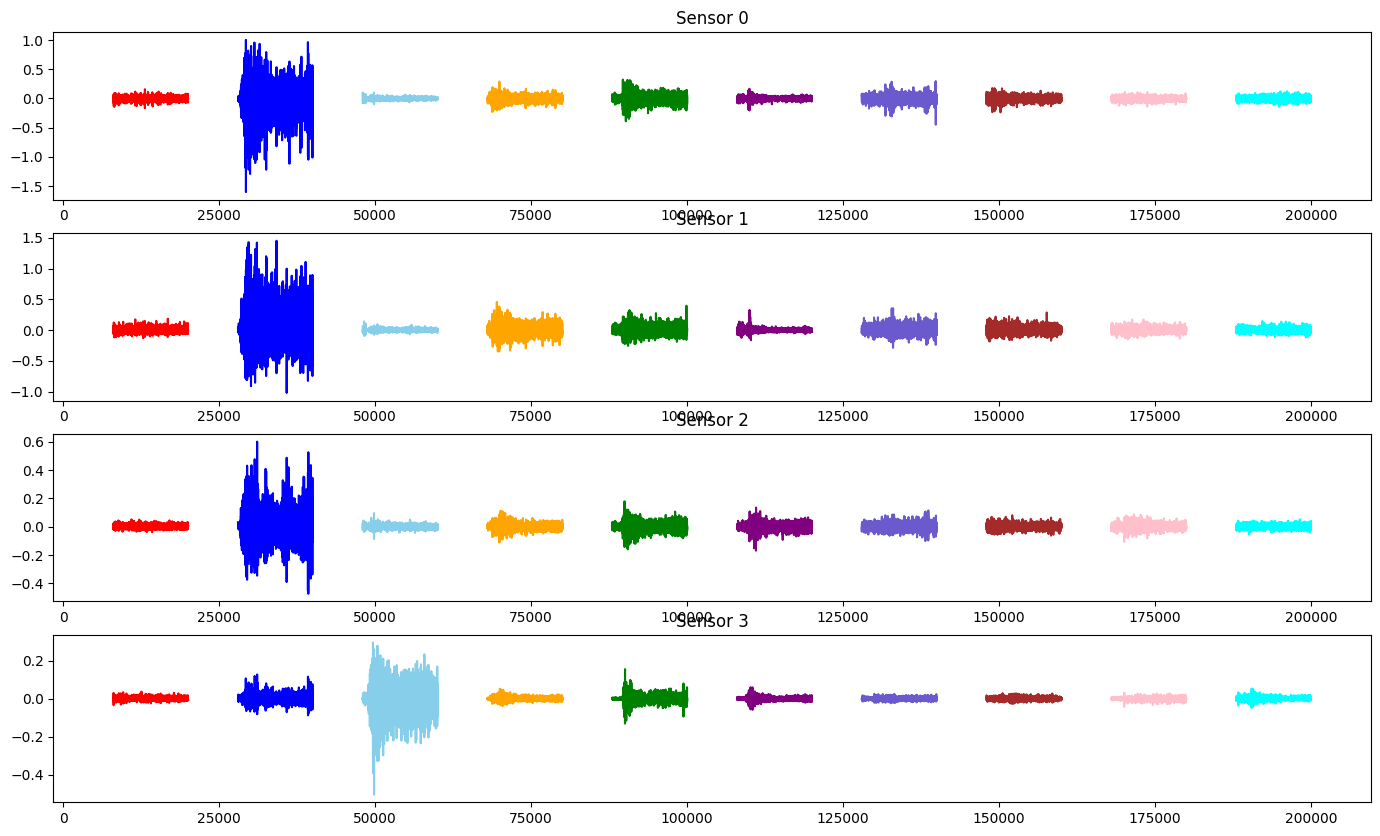

In [2]:
from IPython.display import Image
Image(filename="./sensores_movimetnos.png") 

In [3]:
base = pd.read_csv("./all_data_1sec.csv")
del base[base.columns[0]]
base.head()

,class,SENSOR0_RMS,SENSOR0_WAVELEN,SENSOR0_WAMP,SENSOR0_APPEN,SENSOR0_SAMPEN,SENSOR0_MAV,SENSOR1_RMS,SENSOR1_WAVELEN,SENSOR1_WAMP,...,SENSOR2_WAMP,SENSOR2_APPEN,SENSOR2_SAMPEN,SENSOR2_MAV,SENSOR3_RMS,SENSOR3_WAVELEN,SENSOR3_WAMP,SENSOR3_APPEN,SENSOR3_SAMPEN,SENSOR3_MAV
0,rest,0.027969,16.546442,593,0.829877,0.760960,0.020834,0.030327,20.467188,786,...,73,0.980622,0.878791,0.007530,0.006686,4.317294,31,0.739443,0.656068,0.004683
1,rest,0.314325,232.015644,1874,0.935619,0.873679,0.237730,0.290001,257.021178,1856,...,1613,1.008992,0.948542,0.071562,0.018218,11.062762,341,0.730146,0.491705,0.012646
2,rest,0.021656,13.160815,416,0.866464,0.759422,0.015649,0.021771,12.884492,403,...,219,1.006224,0.734301,0.009192,0.062570,35.654638,844,0.574473,0.184307,0.035975
3,rest,0.056408,35.352780,1188,0.891258,0.775229,0.041269,0.085088,84.416590,1631,...,541,0.974775,0.772864,0.016589,0.007947,5.389142,65,0.798949,0.581650,0.005505
4,rest,0.053758,28.227306,877,0.713120,0.601534,0.033820,0.044414,28.766126,970,...,269,0.763192,0.676346,0.013872,0.009064,4.063544,73,0.480649,0.392418,0.004072


In [4]:
def remove_outliers(ds, col):
    Q1 = ds[col].quantile(0.25)
    Q3 = ds[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return ds[(ds[col] >= lower_bound) & (ds[col] <= upper_bound)]

In [5]:
def get_score_and_accuracy(X, Y):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)

    encoder = LabelEncoder()

    Y_train = encoder.fit_transform(Y_train)
    Y_test = encoder.transform(Y_test)

    model = KNeighborsClassifier()
    model.fit(X_train, Y_train)
    preds_valid = model.predict(X_test)

    dr = {} 
    dr['model'] = 'KNN'
    dr['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr['ACC'] = accuracy_score(Y_test, preds_valid)


    model = SVC()
    model.fit(X_train, Y_train)
    preds_valid = model.predict(X_test)

    dr_svm = {} 
    dr_svm['model'] = 'SVM'
    dr_svm['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_svm['ACC'] = accuracy_score(Y_test, preds_valid)

    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    preds_valid = model.predict(X_test)

    dr_tree = {} 
    dr_tree['model'] = 'Tree Classifier'
    dr_tree['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_tree['ACC'] = accuracy_score(Y_test, preds_valid)

    model = RandomForestClassifier()
    model.fit(X_train, Y_train)

    preds_valid = model.predict(X_test)

    dr_random = {} 
    dr_random['model'] = 'Random Forest'
    dr_random['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_random['ACC'] = accuracy_score(Y_test, preds_valid)

    return pd.DataFrame([dr, dr_svm, dr_tree, dr_random])

In [6]:
# extension
# rest
# sensor_0

classes = ['extension', 'rest']

target_cols = 'class'
train_cols = ['SENSOR0_RMS']

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']

rest_base = remove_outliers(rest_base, 'SENSOR0_RMS')
extension_base = remove_outliers(extension_base, 'SENSOR0_RMS')

cleased_base = pd.concat([rest_base, extension_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.540541,0.459459
1,SVM,0.527027,0.472973
2,Tree Classifier,0.472973,0.527027
3,Random Forest,0.472973,0.527027


In [7]:
classes = ['extension', 'rest']

target_cols = 'class'
train_cols = ['SENSOR0_RMS', 'SENSOR1_RMS', 'SENSOR2_RMS', 'SENSOR3_RMS']

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']

new_rest_bases = []
new_extension_bases = []
for i in train_cols:
    rest_removed = remove_outliers(rest_base, i)
    new_rest_bases.append(rest_removed)

    extension_removed = remove_outliers(extension_base, i)
    new_extension_bases.append(extension_removed)

cleased_base = pd.concat([*new_rest_bases, *new_extension_bases])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.184669,0.815331
1,SVM,0.376307,0.623693
2,Tree Classifier,0.000000,1.000000
3,Random Forest,0.000000,1.000000


In [8]:
base['class'].unique()

array(['rest', 'extension', 'flexion', 'ulnar_deviation',
       'radial_deviation', 'grip', 'finger_abduction', 'finger_adduction',
       'supination', 'pronation'], dtype=object)

In [9]:
classes = ['extension', 'rest', 'flexion']

target_cols = 'class'
train_cols = ['SENSOR0_RMS', 'SENSOR1_RMS', 'SENSOR2_RMS', 'SENSOR3_RMS']

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']
flexion_base = base.loc[base['class'] == 'flexion']

new_rest_bases = []
new_extension_bases = []
new_flexion_bases = []
for i in train_cols:
    rest_removed = remove_outliers(rest_base, i)
    new_rest_bases.append(rest_removed)

    extension_removed = remove_outliers(extension_base, i)
    new_extension_bases.append(extension_removed)

    flexion_removed = remove_outliers(flexion_base, i)
    new_flexion_bases.append(flexion_removed)



cleased_base = pd.concat([*new_rest_bases, *new_extension_bases, *new_flexion_bases])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.402778,0.685185
1,SVM,0.708333,0.469907
2,Tree Classifier,0.062500,0.960648
3,Random Forest,0.043981,0.969907


In [10]:
classes = base['class'].unique()
# classes = ['extension', 'rest', 'flexion']


target_cols = 'class'
train_cols = ['SENSOR0_RMS', 'SENSOR1_RMS', 'SENSOR2_RMS', 'SENSOR3_RMS']


new_bases = []
for i in classes:
    curr_base = base.loc[base['class'] == i]
    for col in train_cols:
        no_out = remove_outliers(curr_base, col)
        new_bases.append(no_out)

cleased_base = pd.concat(new_bases)

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.701585,0.533425
1,SVM,2.861475,0.137836
2,Tree Classifier,0.098553,0.977257
3,Random Forest,0.079256,0.975879


In [11]:
classes = base['class'].unique()
# classes = ['extension', 'rest', 'flexion']


target_cols = 'class'
train_cols = ['SENSOR0_APPEN', 'SENSOR1_APPEN', 'SENSOR2_APPEN', 'SENSOR3_APPEN']


new_bases = []
for i in classes:
    curr_base = base.loc[base['class'] == i]
    for col in train_cols:
        no_out = remove_outliers(curr_base, col)
        new_bases.append(no_out)

cleased_base = pd.concat(new_bases)

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.505083,0.572427
1,SVM,3.151207,0.163914
2,Tree Classifier,0.055273,0.980940
3,Random Forest,0.062897,0.983482


In [12]:
classes = base['class'].unique()
# classes = ['extension', 'rest', 'flexion']


target_cols = 'class'
train_cols = ['SENSOR0_SAMPEN', 'SENSOR1_SAMPEN', 'SENSOR2_SAMPEN', 'SENSOR3_SAMPEN']


new_bases = []
for i in classes:
    curr_base = base.loc[base['class'] == i]
    for col in train_cols:
        no_out = remove_outliers(curr_base, col)
        new_bases.append(no_out)

cleased_base = pd.concat(new_bases)

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.594423,0.567807
1,SVM,3.299747,0.153992
2,Tree Classifier,0.020279,0.992395
3,Random Forest,0.017744,0.992395


In [13]:
classes = base['class'].unique()
# classes = ['extension', 'rest', 'flexion']


target_cols = 'class'
train_cols = ['SENSOR0_MAV', 'SENSOR1_MAV', 'SENSOR2_MAV', 'SENSOR3_MAV']


new_bases = []
for i in classes:
    curr_base = base.loc[base['class'] == i]
    for col in train_cols:
        no_out = remove_outliers(curr_base, col)
        new_bases.append(no_out)

cleased_base = pd.concat(new_bases)

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.796271,0.507597
1,SVM,2.817680,0.138122
2,Tree Classifier,0.068370,0.979282
3,Random Forest,0.076657,0.977901


In [14]:
classes = base['class'].unique()
# classes = ['extension', 'rest', 'flexion']


target_cols = 'class'
train_cols = ['SENSOR0_WAVELEN', 'SENSOR1_WAVELEN', 'SENSOR2_WAVELEN', 'SENSOR3_WAVELEN']


new_bases = []
for i in classes:
    curr_base = base.loc[base['class'] == i]
    for col in train_cols:
        no_out = remove_outliers(curr_base, col)
        new_bases.append(no_out)

cleased_base = pd.concat(new_bases)

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.612613,0.530839
1,SVM,3.095634,0.134442
2,Tree Classifier,0.156618,0.966043
3,Random Forest,0.143451,0.965350


In [15]:
sensor_0 = 'SENSOR0_APPEN'

train_cols = [sensor_0]
target_cols = 'class'

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)

cleased_base = pd.concat([rest_base, extension_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.5125,0.4875
1,SVM,0.5000,0.5000
2,Tree Classifier,0.4750,0.5250
3,Random Forest,0.4750,0.5250


In [16]:
sensor_0 = 'SENSOR0_SAMPEN'

train_cols = [sensor_0]
target_cols = 'class'

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)

cleased_base = pd.concat([rest_base, extension_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.518987,0.481013
1,SVM,0.443038,0.556962
2,Tree Classifier,0.531646,0.468354
3,Random Forest,0.531646,0.468354


In [17]:
sensor_0 = 'SENSOR0_MAV'

train_cols = [sensor_0]
target_cols = 'class'

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)

cleased_base = pd.concat([rest_base, extension_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.500000,0.500000
1,SVM,0.418919,0.581081
2,Tree Classifier,0.567568,0.432432
3,Random Forest,0.567568,0.432432


In [18]:
sensor_0 = 'SENSOR0_WAVELEN'

train_cols = [sensor_0]
target_cols = 'class'

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)

cleased_base = pd.concat([rest_base, extension_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.424658,0.575342
1,SVM,0.424658,0.575342
2,Tree Classifier,0.438356,0.561644
3,Random Forest,0.438356,0.561644


In [19]:
classes = ['extension', 'radial_deviation', 'flexion']
sensor_0 = 'SENSOR0_SAMPEN'

target_cols = 'class'
train_cols = [sensor_0]

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']
flexion_base = base.loc[base['class'] == 'flexion']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)
flexion_base = remove_outliers(flexion_base, sensor_0)

cleased_base = pd.concat([extension_base, flexion_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.4750,0.5250
1,SVM,0.4125,0.5875
2,Tree Classifier,0.5375,0.4625
3,Random Forest,0.5375,0.4625


In [20]:
classes = ['extension', 'radial_deviation', 'flexion', 'ulnar_deviation']
sensor_0 = 'SENSOR0_SAMPEN'

target_cols = 'class'
train_cols = [sensor_0]

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']
flexion_base = base.loc[base['class'] == 'flexion']
ulnar_deviation_base = base.loc[base['class'] == 'ulnar_deviation']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)
flexion_base = remove_outliers(flexion_base, sensor_0)
ulnar_deviation_base = remove_outliers(ulnar_deviation_base, sensor_0)

cleased_base = pd.concat([extension_base, flexion_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,0.5125,0.4875
1,SVM,0.5000,0.5000
2,Tree Classifier,0.4500,0.5500
3,Random Forest,0.4500,0.5500


In [21]:
classes = ['extension', 'radial_deviation', 'flexion', 'ulnar_deviation']
sensor_0 = 'SENSOR3_RMS'

target_cols = 'class'
train_cols = [sensor_0]

rest_base = base.loc[base['class'] == 'rest']
extension_base = base.loc[base['class'] == 'extension']
flexion_base = base.loc[base['class'] == 'flexion']
ulnar_deviation_base = base.loc[base['class'] == 'ulnar_deviation']

rest_base = remove_outliers(rest_base, sensor_0)
extension_base = remove_outliers(extension_base, sensor_0)
flexion_base = remove_outliers(flexion_base, sensor_0)
ulnar_deviation_base = remove_outliers(ulnar_deviation_base, sensor_0)

cleased_base = pd.concat([extension_base, flexion_base, ulnar_deviation_base, rest_base])

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

get_score_and_accuracy(X, Y)

,model,MAE,ACC
0,KNN,1.290780,0.269504
1,SVM,1.290780,0.297872
2,Tree Classifier,1.163121,0.290780
3,Random Forest,1.163121,0.290780


TODO: Test with different classes

Actually try to see the classes where we have an high acc and the low acc

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [80]:
def get_score_and_accuracy_with_cfmx(X, Y, labels=None):
    cfmx_dict = {}
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8,test_size=0.2)

    encoder = LabelEncoder()

    Y_train = encoder.fit_transform(Y_train)
    Y_test = encoder.transform(Y_test)

    model = KNeighborsClassifier()
    model.fit(X_train, Y_train)
    preds_valid = model.predict(X_test)

    dr = {} 
    dr['model'] = 'KNN'
    dr['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr['ACC'] = accuracy_score(Y_test, preds_valid)

    y_true = encoder.inverse_transform(Y_test)
    y_pred = encoder.inverse_transform(preds_valid)
    cfmx_dict['KNN'] = confusion_matrix(y_true, y_pred, labels=labels)


    model = SVC()
    model.fit(X_train, Y_train)
    preds_valid = model.predict(X_test)

    dr_svm = {} 
    dr_svm['model'] = 'SVM'
    dr_svm['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_svm['ACC'] = accuracy_score(Y_test, preds_valid)

    y_true = encoder.inverse_transform(Y_test)
    y_pred = encoder.inverse_transform(preds_valid)
    cfmx_dict['SVM'] = confusion_matrix(y_true, y_pred, labels=labels)

    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)

    preds_valid = model.predict(X_test)

    dr_tree = {} 
    dr_tree['model'] = 'Tree Classifier'
    dr_tree['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_tree['ACC'] = accuracy_score(Y_test, preds_valid)

    y_true = encoder.inverse_transform(Y_test)
    y_pred = encoder.inverse_transform(preds_valid)
    cfmx_dict['Tree Classifier'] = confusion_matrix(y_true, y_pred, labels=labels)

    model = RandomForestClassifier()
    model.fit(X_train, Y_train)

    preds_valid = model.predict(X_test)

    dr_random = {} 
    dr_random['model'] = 'Random Forest'
    dr_random['MAE'] = mean_absolute_error(Y_test, preds_valid)
    dr_random['ACC'] = accuracy_score(Y_test, preds_valid)

    y_true = encoder.inverse_transform(Y_test)
    y_pred = encoder.inverse_transform(preds_valid)
    cfmx_dict['Random Forest'] = confusion_matrix(y_true, y_pred, labels=labels)

    return pd.DataFrame([dr, dr_svm, dr_tree, dr_random]), cfmx_dict

In [51]:
labels = base['class'].unique()
labels

array(['rest', 'extension', 'flexion', 'ulnar_deviation',
       'radial_deviation', 'grip', 'finger_abduction', 'finger_adduction',
       'supination', 'pronation'], dtype=object)

In [81]:
classes = labels
# classes = ['extension', 'rest', 'flexion']


target_cols = 'class'
train_cols = ['SENSOR0_RMS', 'SENSOR1_RMS', 'SENSOR2_RMS', 'SENSOR3_RMS']


new_bases = []
for i in classes:
    curr_base = base.loc[base['class'] == i]
    for col in train_cols:
        no_out = remove_outliers(curr_base, col)
        new_bases.append(no_out)

cleased_base = pd.concat(new_bases)

X = cleased_base[train_cols]
Y = cleased_base[target_cols]

result, cfsmx  = get_score_and_accuracy_with_cfmx(X, Y, labels)
result

,model,MAE,ACC
0,KNN,1.765679,0.539628
1,SVM,2.914542,0.137147
2,Tree Classifier,0.079256,0.984149
3,Random Forest,0.058580,0.985527


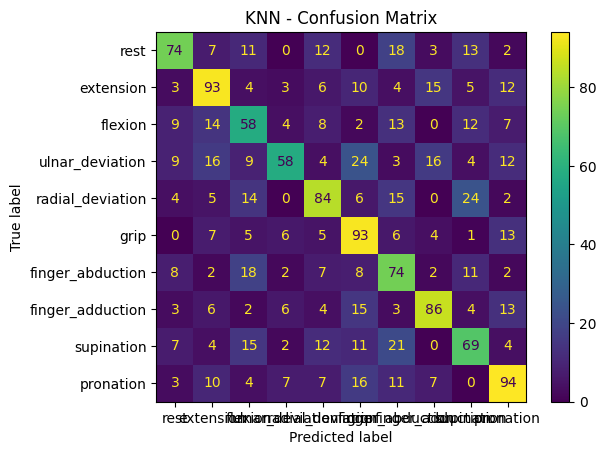

In [94]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_title("KNN - Confusion Matrix")

ConfusionMatrixDisplay(cfsmx['KNN'], display_labels=labels).plot(ax=ax)

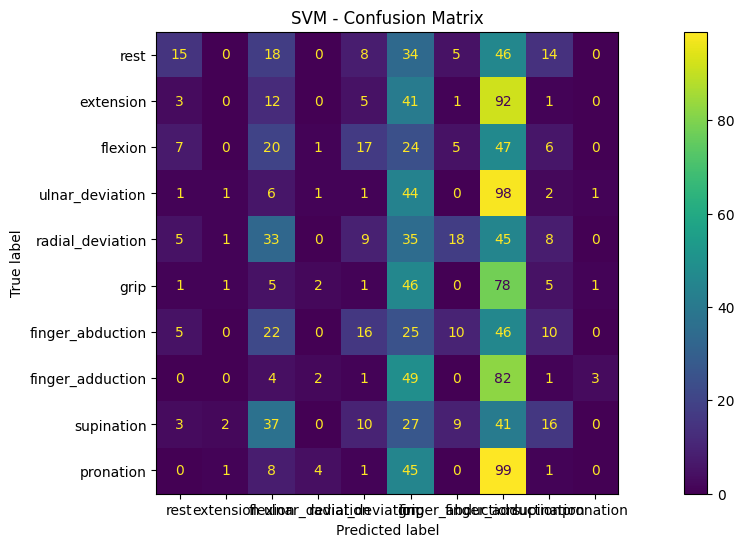

In [95]:
fig = plt.figure(figsize=(17, 6))
ax = fig.add_subplot(1,1,1)
ax.set_title("SVM - Confusion Matrix")

ConfusionMatrixDisplay(cfsmx['SVM'], display_labels=labels).plot(ax=ax)

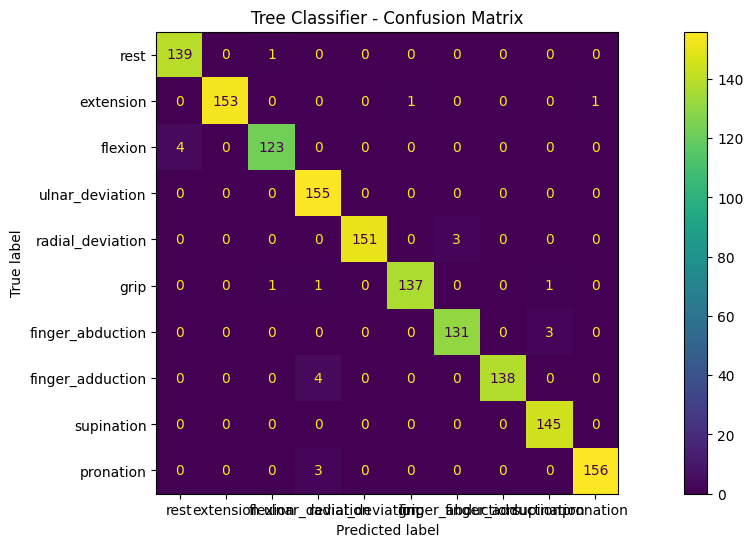

In [96]:
fig = plt.figure(figsize=(17, 6))
ax = fig.add_subplot(1,1,1)
ax.set_title("Tree Classifier - Confusion Matrix")

ConfusionMatrixDisplay(cfsmx['Tree Classifier'], display_labels=labels).plot(ax=ax)

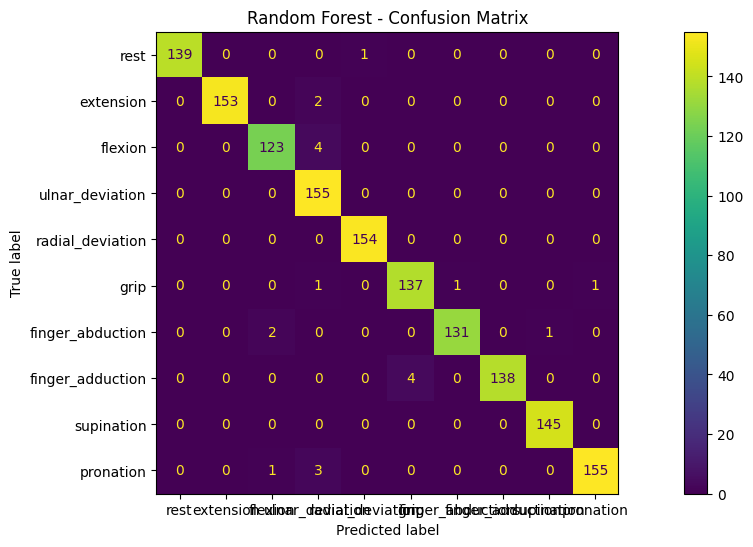

In [98]:
fig = plt.figure(figsize=(17, 6))
ax = fig.add_subplot(1,1,1)
ax.set_title("Random Forest - Confusion Matrix")

ConfusionMatrixDisplay(cfsmx['Random Forest'], display_labels=labels).plot(ax=ax)

## Do a Cross validation to check overfit on Tree and Forest classifiers